<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Data Analysis with Python</h1> <br>
        <b>taught by (alphabetic order) Lukas Arnold, Simone Arnold and My Linh Würzburger</b>
    </div>
    <div style="float:right;"> 
        <img src="images/cce_logo.png" style="width:250px;"/>
    </div>
</div>

Optimization is the process of selecting the best element (with regard to some criterion) from some set of available alternatives.  
Measured data often contain noise, which makes the analysis of curve describing points (minima, maxima, turning points) complex. Therefore the aim of optimization is to find the best set of parameter that describes the given data and allows a simple analysing.
<br>
<br>
When working on data optimization with Python, one should use the package _SciPy_. It is a library (package) which contains modules for optimization like curvefitting, minimization, etc.
<br>
<br>

Examples and more detailed instructions how to use _SciPy_ can be found here:
https://docs.scipy.org/doc/scipy/reference/

### NumPy polyfit

"Polyfit" is a _numpy_ function that computes a least squares polynomial for a given set of data. Polyfit actually generates the coefficients $(a_1, a_2, a_3, ... a_n)$ of the polynomial (which can be used to simulate a curve to fit the data) according to the degree $(n)$ specified. 

$$p(x) = a_1\cdot x^n + a_2\cdot x^{(n-1)}+\dots +a_n$$

"Polyval" evaluates a polynomial for a given set of x values.

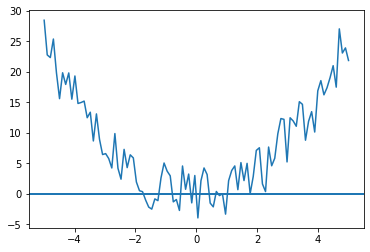

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(12345)

x = np.linspace(-5,5, 100) # Generate 100 x-values from -5 to 5
y = x**2 + 5*(2*np.random.random(len(x))-1) # Create a parabola with noise

plt.plot(x,y)
plt.axhline(y=0, lw=2)
plt.show()
plt.close()

[ 1.00107431  0.05912765 -0.13186965]


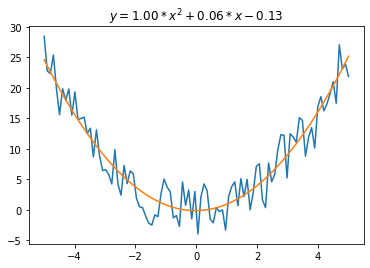

In [25]:
p = np.polyfit(x, y, 2) # Compute the polynomials. Since we try to fit a parabola, the degree for polyfit is 2.
print(p)



y_p = np.polyval(p, x) # Evaluate the fitting curve using polynomials from above

plt.plot(x,y)
plt.plot(x,y_p)

poly_string = "$y = {:.2f}*x^2 {:+.2f}*x {:+.2f}$".format(p[0], p[1], p[2])
plt.title(poly_string)

plt.show()


### SciPy Minimize

Given data is often hard to describe using a polynomial function, which is why the polyfit function cannot be used. A common way to fit this kind of data is the so called _least-squares minimization curve fitting_ algorithm.
<br>
<br>

The procedure is as follows:
1. Define a parametrized model function
1. Define a target function and calculate the Root Mean Squared Error between the model function and the given data
1. Use _scipy.optimize.minimize_ for finding the parameters of the function which minimize the sum of squared errors (between model function and given data)

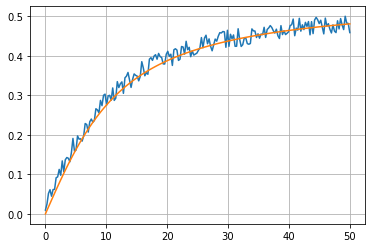

In [39]:
# Example
x = np.linspace(0,50, 200) # Generate 200 x-values from 0 to 50
y = 1/3*np.arctan(0.1*x) + 0.05*np.random.random(len(x)) # Create a non polynomial function -> arctan

x2 = np.linspace(0,50,100)
y2 = 0.35* np.arctan(0.1*x2)

plt.grid()
plt.plot(x,y)
plt.plot(x2,y2)
plt.show()

# plt.plot(x,y)

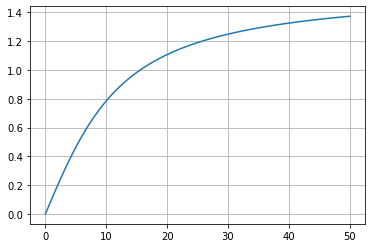

In [40]:
# Step 1: Parametrized function

def my_model(x, a1, a2):
    return a1*np.arctan(a2*x)
    

In [41]:
# Step 2: Target function

def rmse(y1, y2): # Root Mean Squared Error
    r = np.sqrt(np.sum((y1 - y2)**2))
    return r

def target_function(args):
    global x,y
    a1 = args[0]
    a2 = args[1]
    y1 = my_model(x, a1, a2)
    r = rmse(y1, y)
    return r

Parameter a1: 0.3452; a2: 0.1115


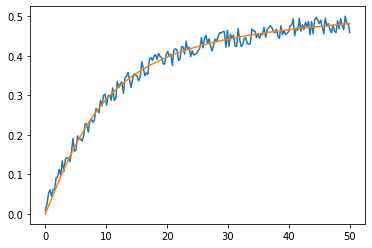

In [43]:
# Step 3: Minimize the sum of squared errors

import scipy.optimize as so

x0 = [0.4,1.8] # Starting values
res = so.minimize(target_function, x0)
print("Parameter a1: {:.4f}; a2: {:.4f}".format(res.x[0], res.x[1]))

plt.plot(x,y)
plt.plot(x,my_model(x, res.x[0], res.x[1]))

### <p style='font-weight:bold; display:inline; color:green'> Task 1: Curve fitting automatization </p>

1. Use NumPy's .loadtxt() routine to access the data stored in data/simulation_00 and plot its content
1. Define the model function which describes the given data
1. Fit a curve using the least-squares minimization algorithm as seen in the example above and print out the optimized parameters

1. Automate the algorithm so that all simulation files in the data folder are analysed

In [ ]:
# Solution


### <p style='font-weight:bold; display:inline; color:green'> Task 2: Curve fitting of measured data </p>

1. Use NumPy's .loadtxt() routine to access the data stored in distance_oszilator.dat
1. Plot the data for x between 10 and 25 and hide all y-values > 40.
1. Fit a curve using the least-squares minimization algorithm as seen in the example above and print out the optimized parameters

_Remark: For the model function, use the following parameterized function:_  

$$f(t) = a_1\cdot e^{-t\cdot a_2}\cdot \sin\left((t-a_3)\cdot a_4\right) + a_5$$

(Damped oszilator)

In [ ]:
# Solution


### <p style='font-weight:bold; display:inline; color:green'> Task 3: Curve Fitting by a Sum of Gaussians </p>

This examples illustrates the automated identification of chemical reactions, here pyrolysis, in a TGA (thermogravimetirc analysis) experiment.

1. Use NumPy's .loadtxt() routine to access the data stored in [PMMA_kompakt_40K.csv](PMMA_kompakt_40K.csv)
1. Plot column 0 against column 1
1. Use the least-squares minimization algorithm to fit a curve to the given data
<br>

_Hints:_
- Use the Gaussian function as a model for this problem $y = A\exp{\left(-\dfrac{(x-x_0)^2}{d^2}\right)}$
- As you can see, the given dataset consists of several Gauss functions. Therefore you should modify the algorithm so that not a single Gaussian function is optimized, but the sum of 4 Gaussian functions.(Modify the traget_function)

In [ ]:
# Solution
